In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import cv2
from PIL import Image

In [53]:
import ast

In [2]:
import matplotlib 
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

In [3]:
cpu_img_path = 'images/352x240_cpu.png'
gpu_img_path = 'images/352x240_gpu.png'

In [5]:
cpu_img = cv2.imread(cpu_img_path)
gpu_img = cv2.imread(gpu_img_path)

In [34]:
n_pixels = np.prod(cpu_img.shape[:2])
cpu_blocksize = 8 * 10
gpu_blocksize = 32 * 10
cpu_blocks = n_pixels / cpu_blocksize
gpu_blocks = n_pixels / gpu_blocksize
cpu_blocks, gpu_blocks

(1056.0, 264.0)

In [45]:
cpu_animation = []
gpu_animation = []

empty_img = np.zeros(cpu_img.shape)
for block in range(int(cpu_blocks)):
    cur_img = empty_img.copy().ravel()
    cur_img[0: block * cpu_blocksize * 3] = cpu_img.ravel()[0: block * cpu_blocksize * 3]
    cur_img = cur_img.reshape(empty_img.shape)
    cpu_animation.append(Image.fromarray(cur_img.astype(np.uint8)))
    
empty_img = np.zeros(cpu_img.shape)
for block in range(int(gpu_blocks)):
    cur_img = empty_img.copy().ravel()
    cur_img[0: block * gpu_blocksize * 3] = gpu_img.ravel()[0: block * gpu_blocksize * 3]
    cur_img = cur_img.reshape(empty_img.shape)
    gpu_animation.append(Image.fromarray(cur_img.astype(np.uint8)))
    

In [44]:
1056 * 80

84480

In [40]:
float(43 / cpu_blocks)

0.04071969696969697

In [46]:
cpu_animation[0].save('images/352x240_cpu.gif',
               save_all = True, append_images = cpu_animation[1:],
               optimize = False, duration = float(43 / cpu_blocks))

In [47]:
gpu_animation[0].save('images/352x240_gpu.gif',
               save_all = True, append_images = gpu_animation[1:],
               optimize = False, duration = float(0.01 / gpu_blocks))

In [24]:
imageio.mimsave('images/352x240_gpu.gif', cpu_animation, duration=0.01 / gpu_blocks)

In [105]:
df = pd.read_csv('../results.csv')
columns = df.columns
columns

Index(['Unnamed: 0', '352x240', '480x360', '858x480', '1280x720'], dtype='object')

In [106]:
df

Unnamed: 0                                            352x240  \
0        cpu  [32.63990330696106, 32.55919575691223, 34.3142...   
1        gpu  [0.01107999961823225, 0.010443000122904778, 0....   

                                             480x360  \
0  [62.156848192214966, 63.66024708747864, 62.004...   
1  [0.016635999083518982, 0.017020000144839287, 0...   

                                             858x480  \
0  [138.83156633377075, 138.02365469932556, 137.9...   
1  [0.032023001462221146, 0.031488001346588135, 0...   

                                            1280x720  
0  [310.8405463695526, 309.74497532844543, 309.63...  
1  [0.06293900310993195, 0.06325700134038925, 0.0...

In [107]:
data_str = df.iloc[:, 1:].values

In [108]:
data_cpu = np.zeros((4, 10))
data_gpu = np.zeros((4, 100))

In [109]:
for x in range(4):
    data_cpu[x] = ast.literal_eval(data_str[0, x])
    data_gpu[x] = ast.literal_eval(data_str[1, x])

In [110]:
data_cpu

array([[ 32.63990331,  32.55919576,  34.31424022,  32.4009223 ,
         32.10104394,  32.23590589,  32.36492205,  32.22821331,
         32.61572433,  32.70323825],
       [ 62.15684819,  63.66024709,  62.00456643,  62.46967149,
         63.41489363,  60.49766707,  63.2983892 ,  63.29652643,
         61.53102612,  63.68381262],
       [138.83156633, 138.0236547 , 137.95446801, 137.60453391,
        136.87444568, 140.55363512, 138.17017102, 137.2584219 ,
        141.19462204, 139.94415116],
       [310.84054637, 309.74497533, 309.63052654, 306.06428266,
        302.79350877, 309.76209092, 309.57188249, 309.19983912,
        308.32234764, 308.3989296 ]])

In [111]:
xticks = ['352x240', '480x360', '858x480', '1280x720']

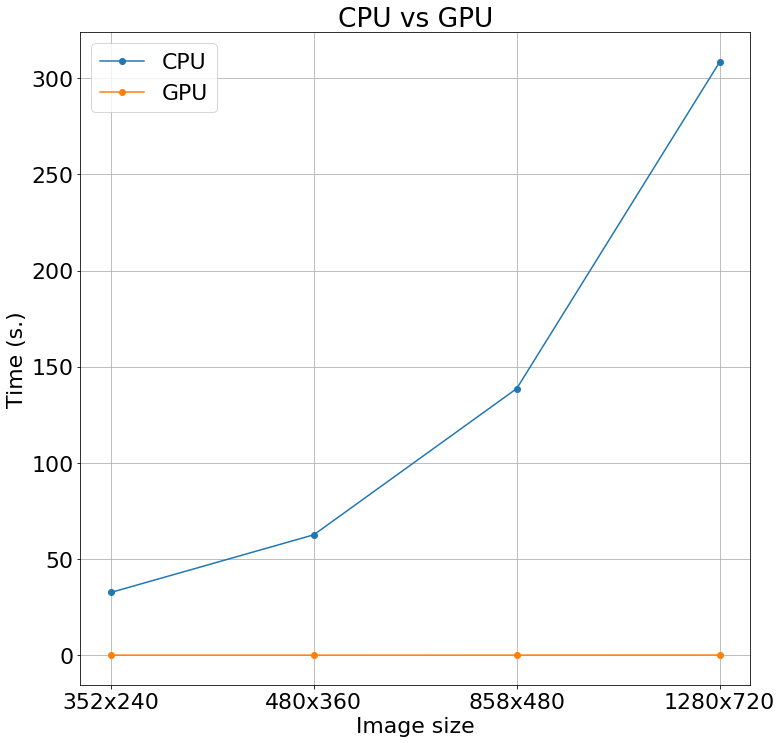

In [112]:
fig = plt.figure(figsize=(12, 12))

plt.plot(np.mean(data_cpu, axis=1), '-o', label="CPU")
plt.plot(np.mean(data_gpu, axis=1), '-o', label="GPU")

plt.title("CPU vs GPU")
plt.xlabel("Image size")
plt.ylabel("Time (s.)")
plt.xticks(np.arange(4), xticks)

plt.grid()
plt.legend()
fig.savefig(os.path.join('images', 'cpu_vs_gpu.svg'))

No handles with labels found to put in legend.


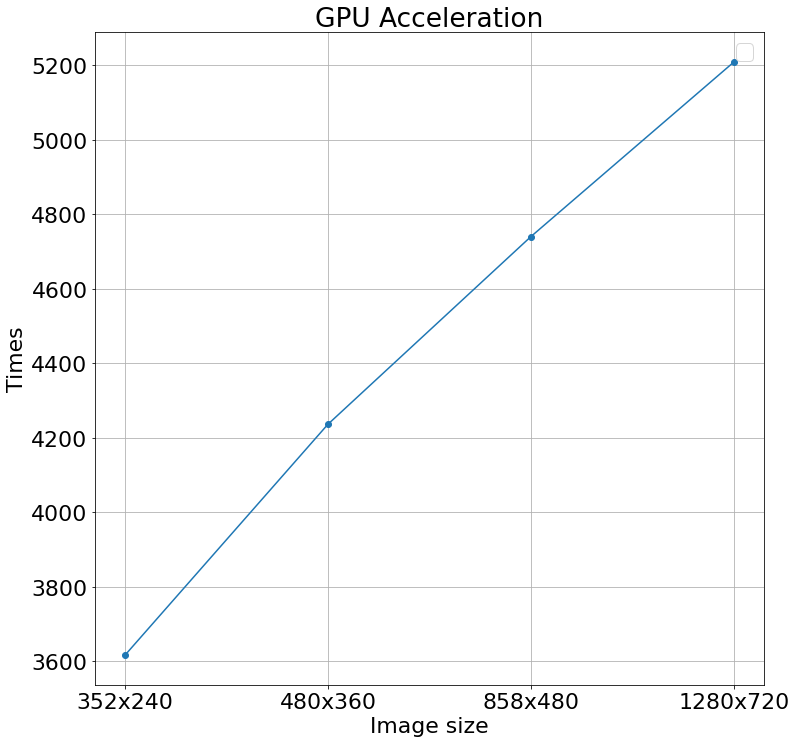

In [113]:
fig = plt.figure(figsize=(12, 12))

plt.plot(np.mean(data_cpu, axis=1) / np.mean(data_gpu, axis=1), '-o')

plt.title("GPU Acceleration")
plt.xlabel("Image size")
plt.ylabel("Times")
plt.xticks(np.arange(4), xticks)

plt.grid()
plt.legend()
fig.savefig(os.path.join('images', 'acceleration.svg'))

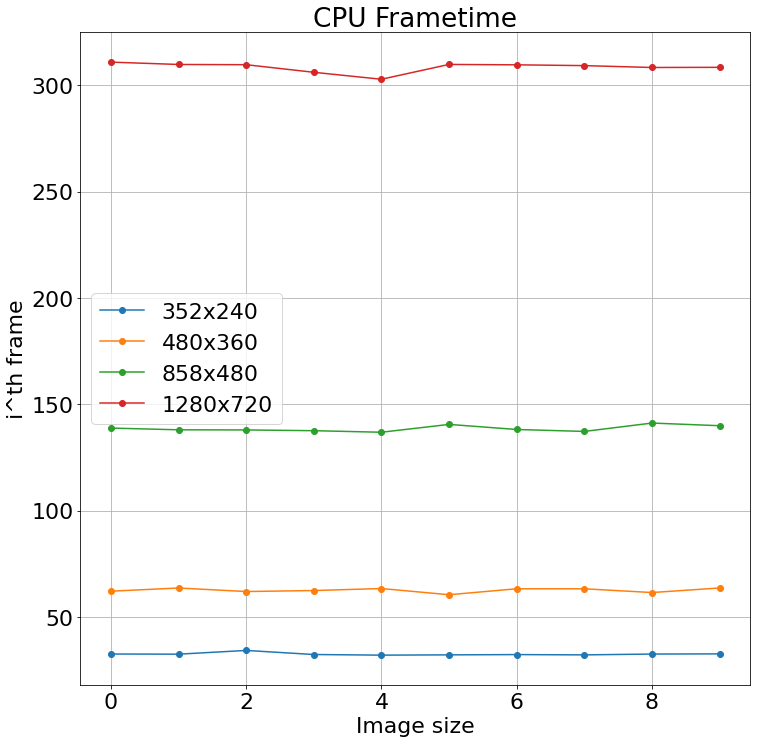

In [114]:
fig = plt.figure(figsize=(12, 12))

for i in range(4):
    plt.plot(data_cpu[i], '-o', label=xticks[i])

plt.title("CPU Frametime")
plt.xlabel("Image size")
plt.ylabel("i^th frame")
# plt.xticks(np.arange(4), xticks)

plt.grid()
plt.legend()
fig.savefig(os.path.join('images', 'cpu_frametime.svg'))

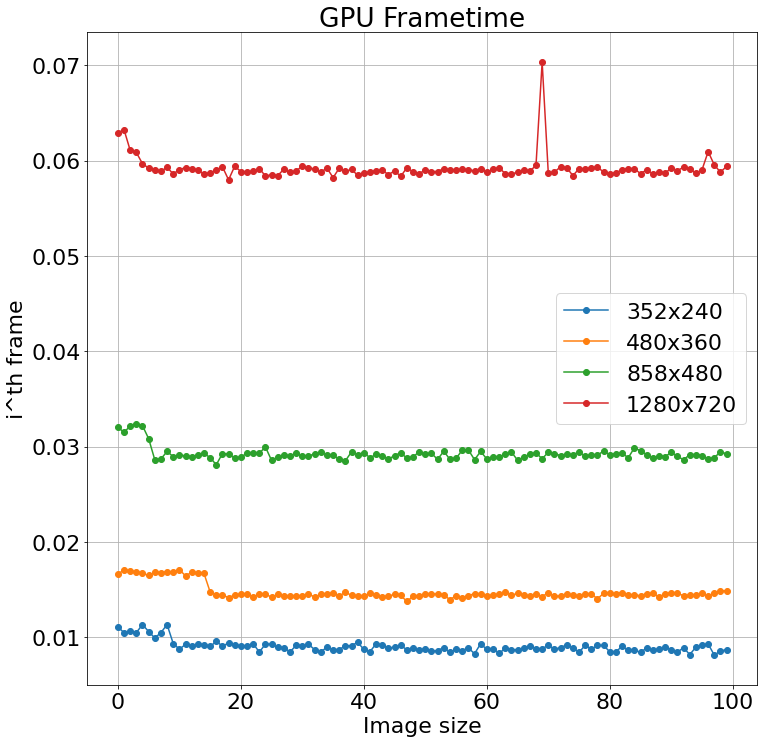

In [115]:
fig = plt.figure(figsize=(12, 12))

for i in range(4):
    plt.plot(data_gpu[i], '-o', label=xticks[i])

plt.title("GPU Frametime")
plt.xlabel("Image size")
plt.ylabel("i^th frame")
# plt.xticks(np.arange(4), xticks)

plt.grid()
plt.legend()
fig.savefig(os.path.join('images', 'gpu_frametime.svg'))

In [130]:
table = {f'{size}': {
    'FPS': [],
    '1% LOW FPS': [],
    '0.1% LOW FPS': [],
    'AVG. Framerate': []
} for size in xticks}


In [131]:
for i in range(4):
    size = xticks[i]
    table[size]['FPS'] = 1 / np.mean(data_gpu[i])
    table[size]['1% LOW FPS'] = 1 / np.mean(list(sorted(data_gpu[i], reverse=True))[:10])
    table[size]['0.1% LOW FPS'] = 1 / 1 / list(sorted(data_gpu[i], reverse=True))[0]
    table[size]['AVG. Framerate'] = np.mean(data_gpu[i])

In [132]:
pd.DataFrame(table).to_html('results_table.html')

In [119]:
df = pd.read_csv('../hard_results.csv')
columns = df.columns
columns

Index(['Unnamed: 0', '352x240', '480x360', '858x480', '1280x720'], dtype='object')

In [120]:
df

Unnamed: 0                                            352x240  \
0        cpu                                                 []   
1        gpu  [0.6619160175323486, 0.6924489736557007, 0.654...   

                                             480x360  \
0                                                 []   
1  [1.3104599714279175, 1.2009819746017456, 1.283...   

                                             858x480  \
0                                                 []   
1  [2.586658000946045, 2.679738998413086, 2.63999...   

                                            1280x720  
0                                                 []  
1  [5.94068717956543, 5.998126029968262, 5.908723...

In [121]:
data_str = df.iloc[:, 1:].values

In [122]:
data_hard_gpu = np.zeros((4, 100))

In [123]:
for x in range(4):
    data_hard_gpu[x] = ast.literal_eval(data_str[1, x])

In [124]:
data_hard_gpu

array([[0.66191602, 0.69244897, 0.65413803, 0.64431298, 0.65057403,
        0.67183501, 0.67962903, 0.66514999, 0.72350401, 0.66553903,
        0.66133398, 0.67205399, 0.69869798, 0.62484002, 0.672198  ,
        0.68048799, 0.65799999, 0.66791302, 0.66324401, 0.63968998,
        0.72170299, 0.66351199, 0.65730399, 0.662247  , 0.66576099,
        0.70387501, 0.65366298, 0.65123302, 0.70201099, 0.693901  ,
        0.70932102, 0.69575202, 0.64416599, 0.68289697, 0.66844201,
        0.65536398, 0.66786402, 0.66337103, 0.663302  , 0.63814998,
        0.684129  , 0.66459399, 0.64858598, 0.63831699, 0.69230598,
        0.669554  , 0.67556298, 0.69236398, 0.69477499, 0.63815498,
        0.65519702, 0.658656  , 0.69916898, 0.70631099, 0.70433199,
        0.65323001, 0.67188603, 0.63915801, 0.66295397, 0.71723801,
        0.64559901, 0.70895499, 0.66829598, 0.66313797, 0.66932899,
        0.66274798, 0.67752898, 0.69817501, 0.663073  , 0.65330702,
        0.64992601, 0.64974999, 0.64434803, 0.65

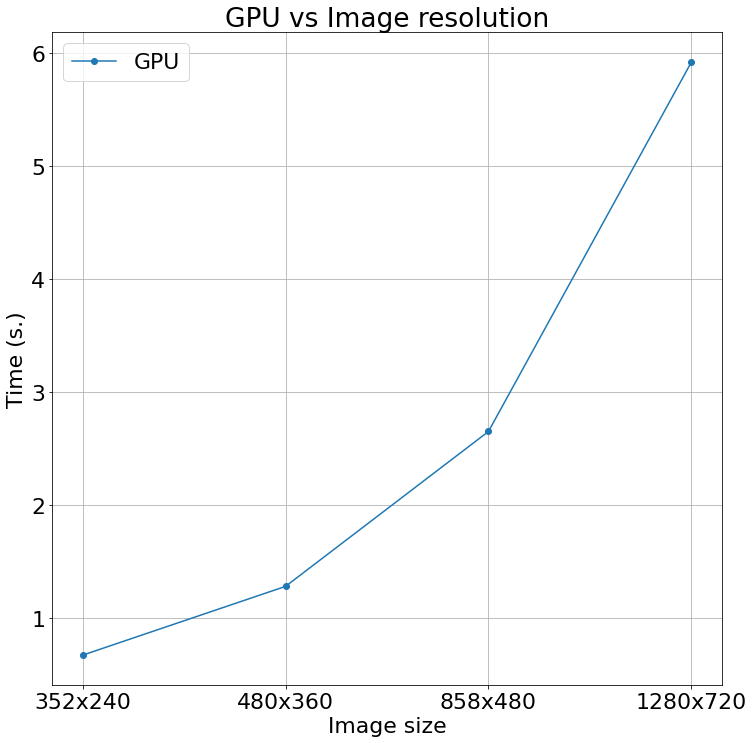

In [125]:
fig = plt.figure(figsize=(12, 12))

plt.plot(np.mean(data_hard_gpu, axis=1), '-o', label="GPU")

plt.title("GPU vs Image resolution")
plt.xlabel("Image size")
plt.ylabel("Time (s.)")
plt.xticks(np.arange(4), xticks)

plt.grid()
plt.legend()
fig.savefig(os.path.join('images', 'hard_gpu.svg'))

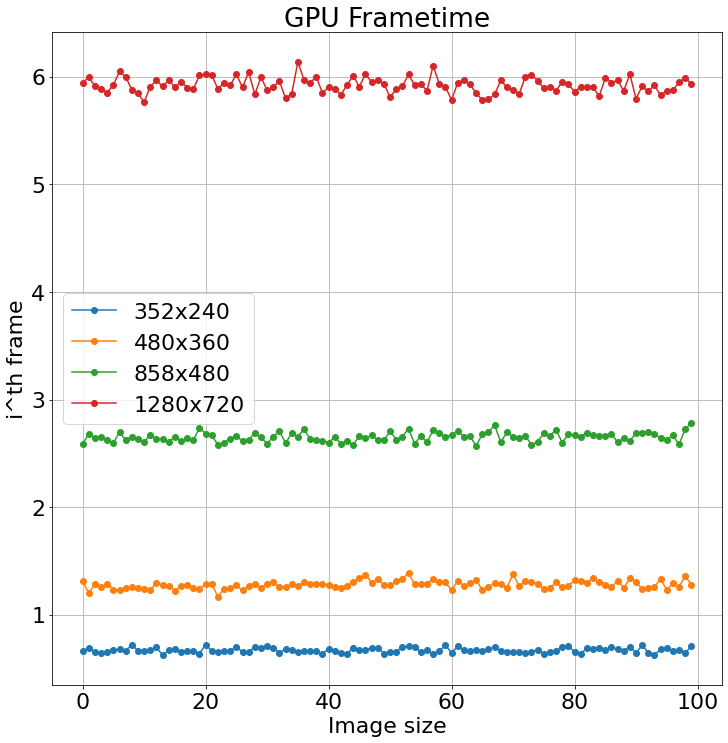

In [126]:
fig = plt.figure(figsize=(12, 12))

for i in range(4):
    plt.plot(data_hard_gpu[i], '-o', label=xticks[i])

plt.title("GPU Frametime")
plt.xlabel("Image size")
plt.ylabel("i^th frame")
# plt.xticks(np.arange(4), xticks)

plt.grid()
plt.legend()
fig.savefig(os.path.join('images', 'hard_gpu_frametime.svg'))

In [133]:
table = {f'{size}': {
    'FPS': [],
    '1% LOW FPS': [],
    '0.1% LOW FPS': [],
    'AVG. Framerate': []
} for size in xticks}


In [134]:
for i in range(4):
    size = xticks[i]
    table[size]['FPS'] = 1 / np.mean(data_hard_gpu[i])
    table[size]['1% LOW FPS'] = 1 / np.mean(list(sorted(data_hard_gpu[i], reverse=True))[:10])
    table[size]['0.1% LOW FPS'] = 1 / 1 / list(sorted(data_hard_gpu[i], reverse=True))[0]
    table[size]['AVG. Framerate'] = np.mean(data_hard_gpu[i])

In [135]:
pd.DataFrame(table).to_html('hard_results_table.html')